In [1]:
from utilities import *
import matplotlib.pyplot as plt
import seaborn as sns
import string
from matplotlib.colors import LinearSegmentedColormap

In [2]:
class ECDF_Flows(Flows):
    def ecdf_dataframes(self):
        self.ecdf_dfs = dict.fromkeys(ROBUST_POLICY_LIST)
        for policy in ROBUST_POLICY_LIST:
            self.ecdf_dfs[policy] = pd.DataFrame(columns=SORTED_PROJECTIONS)
            for projection in SORTED_PROJECTIONS:
                self.ecdf_dfs[policy][projection] = self.scenarios[projection][policy]
    

In [3]:
HUC_7Q = pd.read_csv('../../../Historical/Extremes/UC_7Q.csv', index_col = 'Unnamed: 0')
HUC_AMS = pd.read_csv('../../../Historical/Extremes/Uncontrolled_AMS.csv', index_col = 'date')

In [4]:
low_flows = ECDF_Flows("7Q", 'Unnamed: 0', HUC_7Q)
high_flows = ECDF_Flows("AMS", 'date', HUC_AMS)

In [5]:
low_flows.ecdf_dataframes()
high_flows.ecdf_dataframes()

In [6]:
ROBUST_POLICY_LIST

['P86', 'P72', 'P41', 'PUC']

In [7]:
ROBUST_POLICIES

{'Low Flow': 'P86', 'High Flow': 'P72', 'Compromise': 'P41', 'PUC': 'PUC'}

In [8]:
ROBUST_POLICY_TITLES = {
    'P86': 'Best Low Flow Policy',
    'P72': 'Best High Flow Policy',
    'P41': 'Compromise Policy',
    'PUC': 'Projected Uncontrolled'
}

In [9]:
import numpy as np

# Fixing random state for reproducibility
np.random.seed(1)

In [10]:
LOW_FLOW_PROJECTIONS['PUC']

['ACCESS1-0.rcp45',
 'CCSM4.rcp60',
 'CESM1-BGC.rcp45',
 'CNRM-CM5.rcp26',
 'CNRM-CM5.rcp45',
 'CSIRO-Mk3-6-0.rcp60',
 'CSIRO-Mk3-6-0.rcp85',
 'GFDL-CM3.rcp26',
 'GFDL-CM3.rcp60',
 'GFDL-CM3.rcp85',
 'GFDL-ESM2G.rcp45',
 'GFDL-ESM2G.rcp60',
 'GFDL-ESM2M.rcp26',
 'GFDL-ESM2M.rcp45',
 'GFDL-ESM2M.rcp60',
 'GFDL-ESM2M.rcp85',
 'HadGEM2-CC.rcp85',
 'HadGEM2-ES.rcp60',
 'MIROC-ESM-CHEM.rcp26',
 'MIROC-ESM.rcp26',
 'MIROC-ESM.rcp85',
 'MPI-ESM-LR.rcp26',
 'MPI-ESM-LR.rcp45',
 'MPI-ESM-LR.rcp85',
 'MPI-ESM-MR.rcp26',
 'MPI-ESM-MR.rcp45',
 'MPI-ESM-MR.rcp85',
 'NorESM1-M.rcp26',
 'NorESM1-M.rcp45',
 'NorESM1-M.rcp60',
 'NorESM1-M.rcp85']

In [11]:
class Plotter:
    def __init__(self, low_flows, high_flows):
        self.high_flows = high_flows
        self.low_flows = low_flows
        self.cmap = plt.cm.get_cmap('RdBu')
        
    def generate_colorbars(self):
        self.cbar_patterns = {
            'Low Flow': {},
            'High Flow': {}
        }
        self.cbars = {
            'Low Flow': {},
            'High Flow': {}
        }
        for policy in ['PUC', 'P86', 'P72', 'P41']:
            self.cbar_patterns['Low Flow'][policy] = []
            self.cbar_patterns['High Flow'][policy] = []
            sp = SORTED_PROJECTIONS[::-1]
            
            for projection in sp:
                if (projection in LOW_FLOW_PROJECTIONS[policy]):
                    #& (projection in LOW_FLOW_TRENDS[policy]['No Trend']):
                    self.cbar_patterns['Low Flow'][policy].append('#000000')
                else:
                    self.cbar_patterns['Low Flow'][policy].append('#FFFFFF')
                if (projection in HIGH_FLOW_PROJECTIONS[policy]):  
                    # & (projection in HIGH_FLOW_TRENDS[policy]['No Trend']):
                    self.cbar_patterns['High Flow'][policy].append('#000000')
                else:
                    self.cbar_patterns['High Flow'][policy].append('#FFFFFF')
            
            self.cbars['Low Flow'][policy] = LinearSegmentedColormap.from_list(f'Low Flow {policy}', self.cbar_patterns['Low Flow'][policy], N=48)
            self.cbars['High Flow'][policy] = LinearSegmentedColormap.from_list(f'High Flow {policy}', self.cbar_patterns['High Flow'][policy], N=48)

        
    def plot(self):
        # ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8))
        fig, axs = plt.subplots(4,2)
        sns.set(style="dark")
        
        i=0
        for policy in ['PUC', 'P86', 'P72', 'P41']:
            print(policy)
            for projection in SORTED_PROJECTIONS:
                x, y = ecdf(self.low_flows[policy][projection])
                # removeD: & (projection in LOW_FLOW_TRENDS[policy]['No Trend'])
                axs[i,0].plot(x,
                              y,
                              color = self.cmap(PROJECTION_COLOR_DICTIONARY[projection]), 
                              linewidth = 3 if (projection in LOW_FLOW_PROJECTIONS[policy]) else 1,
                              alpha = 1 if (projection in LOW_FLOW_PROJECTIONS[policy]) else 0.3,
                              zorder=np.random.random()+1 if (projection in LOW_FLOW_PROJECTIONS[policy]) else np.random.random()
                             )
                
                axs[i,0].set_xlim(0,5000)
                
                x, y = ecdf(self.high_flows[policy][projection])
                # removed:  & (projection in HIGH_FLOW_TRENDS[policy]['No Trend']) 
                axs[i,1].plot(x,y, color = self.cmap(PROJECTION_COLOR_DICTIONARY[projection]), 
                             linewidth = 3 if (projection in HIGH_FLOW_PROJECTIONS[policy]) else 1,
                             alpha = 1 if (projection in HIGH_FLOW_PROJECTIONS[policy])  else 0.3,
                             zorder=np.random.random()+1 if (projection in LOW_FLOW_PROJECTIONS[policy])else np.random.random())
                axs[i,1].set_xlim(0,12000)
            x_h, y_h = ecdf(HUC_7Q['00'])
            axs[i,0].plot(x_h, y_h, color = 'black', linewidth = 3)
            x_h, y_h = ecdf(HUC_AMS['00'])
            axs[i,1].plot(x_h, y_h, color = 'black', linewidth = 3)
            axs[i,1].set_yticklabels("")
            axs[i,0].set_title(ROBUST_POLICY_TITLES[policy])
            axs[i,1].set_title(ROBUST_POLICY_TITLES[policy])
            if i < 3:
                axs[i,1].set_xticklabels("")
                axs[i,0].set_xticklabels("")
            else:
                axs[i,0].set_xlabel("7Q10 (cms)")
                axs[i,1].set_xlabel("AMS (cms)")
            i+=1

        k = 0
        for b in range(len(ROBUST_POLICY_LIST) * 2):
            axs.flatten()[b].text(0.008, 0.9, "("+ string.ascii_lowercase[b] + ")", transform=axs.flatten()[b].transAxes, 
            size=13, weight='bold')
            k+=1


        fig.set_size_inches(7,10)
        fig.text(0.32, 1.0, 'Low Flows', ha='center', fontsize=18)
        fig.text(0.77, 1.0, 'High Flows', ha='center', fontsize=18)
        
        # color bar
        sm = plt.cm.ScalarMappable(cmap='RdBu')
        sm.set_array([0,1])
        cbar_ax = fig.add_axes([0.22, -0.015, 0.6, 0.02])
        cbar = fig.colorbar(sm, cax = cbar_ax, orientation='horizontal', ticks=np.arange(0.0,2,1))
        cbar.ax.set_xticklabels(['Dry', 'Wet'],fontsize=12)
        cbar.ax.tick_params(axis='x', labelsize=14)
        
        fig.tight_layout()
        plt.savefig('Figures/ECDF.svg', bbox_inches='tight')
        plt.savefig('Figures/ECDF.png', bbox_inches='tight')
        plt.savefig('Figures/ECDF.pdf', bbox_inches='tight')

        
        



In [12]:
ecdf_plot = Plotter(low_flows.ecdf_dfs, high_flows.ecdf_dfs)

In [13]:
ecdf_plot.generate_colorbars()

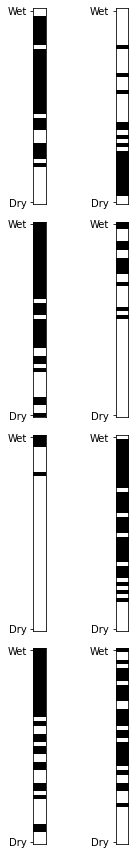

In [14]:
fig, axs = plt.subplots(4, 2, figsize=(3, 12))

# for i, (policy, projection_cbar) in enumerate(ecdf_plot.cbars.items()):
pols = ['PUC', 'P86', 'P72', 'P41']
for i in range(len(pols)):
    policy = pols[i]
    print(ecdf_plot.cbars['Low Flow'][policy])

    # Create a dummy plot with the custom colormap
    dummy_values = np.linspace(0, 1, 48)  # Dummy data for the colorbar
    dummy_values_transposed = dummy_values[:, np.newaxis]

    dummy_plot = axs[i,0].imshow(np.tile(dummy_values_transposed, (1,3)), cmap=ecdf_plot.cbars['Low Flow'][policy])
    dummy_plot2 = axs[i,1].imshow(np.tile(dummy_values_transposed,(1,3)), cmap=ecdf_plot.cbars['High Flow'][policy])


#     # Create the colorbar for the dummy plot
#     cbar = axs[i,0].colorbar(dummy_plot)
#     cbar2 = axs[i,1].colorbar(dummy_plot2)
                                   
    # Remove tick labels
    axs[i, 0].set_yticks([])
    axs[i, 1].set_yticks([])
    axs[i, 0].set_xticks([])
    axs[i, 1].set_xticks([])

    # Set custom labels
    axs[i, 0].set_yticks([0, 47])
    axs[i, 0].set_yticklabels(['Wet', 'Dry'])
    axs[i, 1].set_yticks([0, 47])
    axs[i, 1].set_yticklabels(['Wet', 'Dry'])


    

# Adjust layout and spacing
plt.tight_layout()

# Show or save the figure as needed
plt.savefig('Figures/cbars.svg')
plt.savefig('Figures/cbars.pdf')

plt.show()

PUC
P86
P72
P41


<ipython-input-11-de8e456899f0>:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


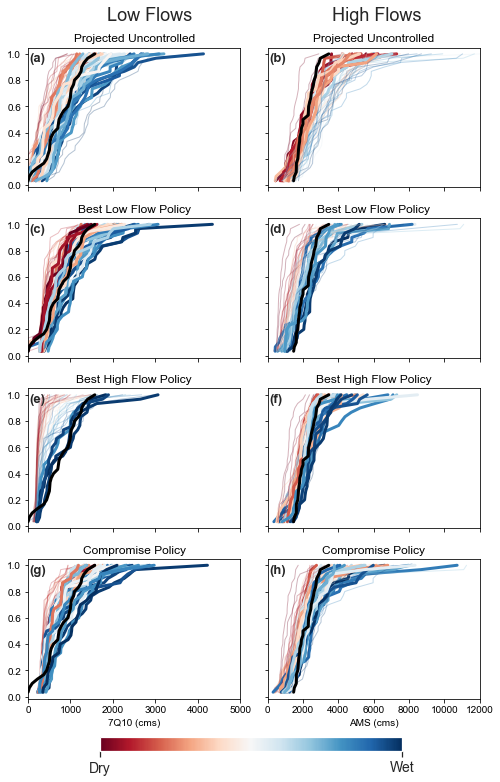

In [15]:
ecdf_plot.plot()